In [1]:
from pymatgen.core import Element
from gensim.models.doc2vec import Doc2Vec
import matplotlib.pyplot as plt
from pymatgen.core import periodic_table
from sklearn.decomposition import PCA
import matplotlib as mpl
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['font.size'] = 13

In [6]:
model = Doc2Vec.load("../results/rsm/run-20230524_205752-a9yhtq90/tmp/embedding_model.pt")

In [2]:
model = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230608_072439-rj0lcx8w/tmp/embedding_model.pt")

In [3]:
ele_vec = {}
ele_group = {}
for i in range(len(periodic_table.Element)):
    i += 1
    ele = Element.from_Z(i)
    if ("%s" %i) in model.wv.index_to_key:
        ele_vec.update({ele.symbol: model.wv["%s" %i]})
        ele_group.update({ele.symbol: ele.group})


In [5]:
ele_vec = {}
ele_group = {}
for i in range(len(periodic_table.Element)):
    i += 1
    ele = Element.from_Z(i)
    if ele.symbol in model.wv.index_to_key:
        ele_vec.update({ele.symbol: model.wv[ele.symbol]})
        ele_group.update({ele.symbol: ele.group})

In [6]:
ele_vec.keys()
print(len(ele_vec.keys()))

85


In [7]:
vec_to_tsne = np.array([ele_vec[it] for it in ele_vec])
tsne_obj = TSNE(n_components=2, learning_rate=200, random_state=2023, n_jobs=6)
vec_from_tsne = tsne_obj.fit_transform(vec_to_tsne)

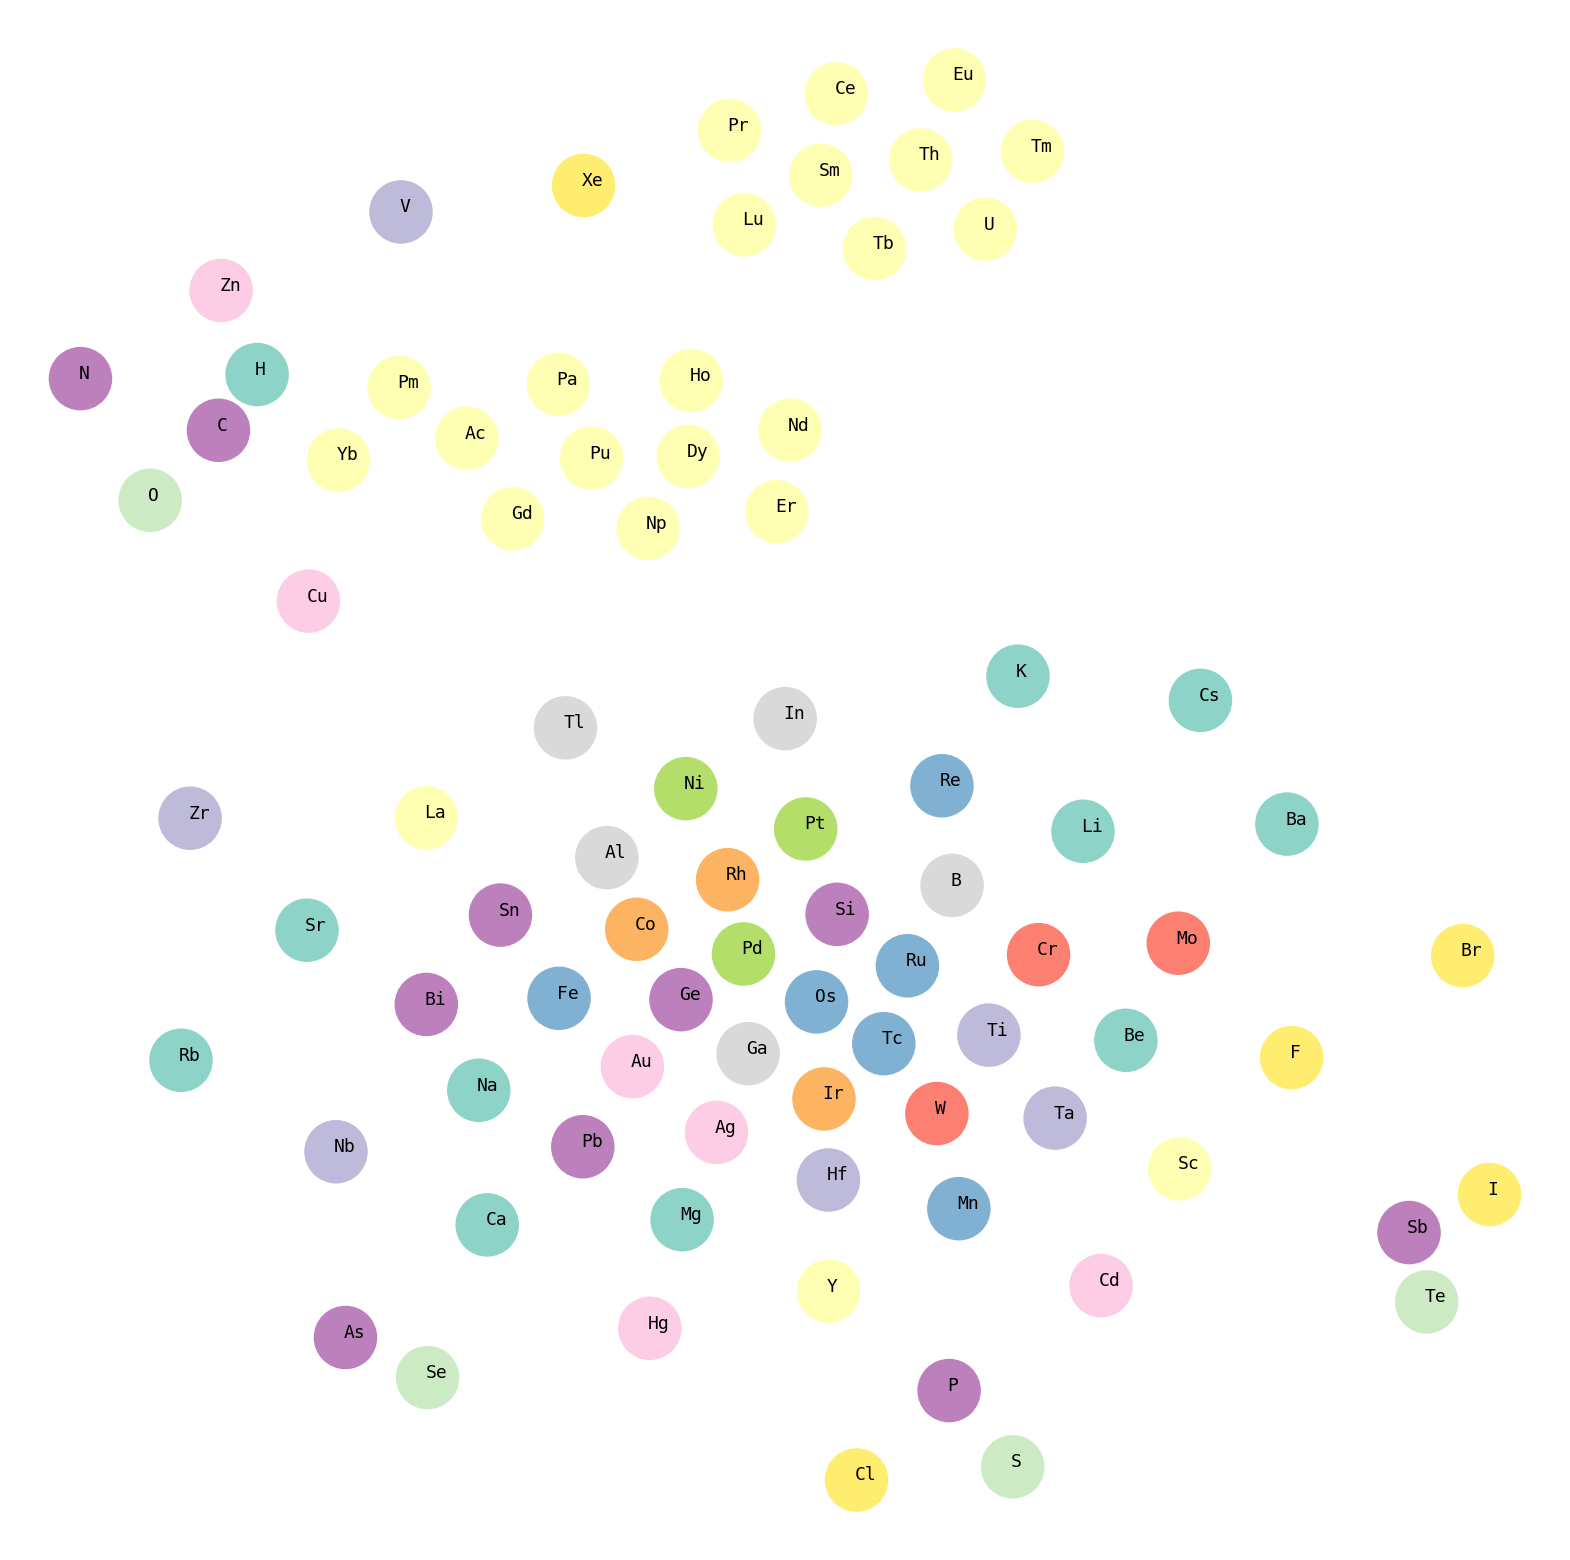

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
fig.patch.set_visible(False)
ax.axis('off')

ax.scatter(vec_from_tsne[:,0], vec_from_tsne[:,1], c=[ele_group[it] for it in ele_group], cmap="Set3", s=2000)

for i, ele in enumerate(ele_vec):
    ax.annotate(ele, (vec_from_tsne[:,0][i]-0.08, vec_from_tsne[:,1][i]-0.03))

#fig.savefig("../../../files/hmof_period_table_tsne.png")
    

In [59]:
model.wv.most_similar(positive=["H_C"], negative=["C_C_O_O"])

[('C_C_C_H_N', 0.42125949263572693),
 ('Mn_O_O_O_O_O_O', 0.35054799914360046),
 ('Cu_O_O_O_O', 0.33367985486984253),
 ('H_O', 0.33286431431770325),
 ('Ce_O_O_O_O_O_O_O_O', 0.3311549723148346),
 ('Mg_O_O_O_O_O', 0.3303939402103424),
 ('Ag_Ag_Ag_Ag_Ag', 0.3274858295917511),
 ('O_Mg_Mg_Mg', 0.32645183801651),
 ('C_C', 0.3257621228694916),
 ('Mn_N_O_O_O_O', 0.3245336711406708)]

In [15]:
df_label = pd.read_csv("../data/qmof-data.csv").set_index("qmof_id")

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_58043/2620641489.py:1: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_label = pd.read_csv("../data/qmof-data.csv").set_index("qmof_id")


In [16]:
keys = model.dv.index_to_key

In [17]:
mof_arr = np.array([model.dv[key] for key in keys])

In [18]:
arr_reducer = TSNE(n_components=2, learning_rate=200, random_state=2023, n_jobs=6)
mof_arr_2d = arr_reducer.fit_transform(mof_arr)

In [19]:
df_label.columns

Index(['Unnamed: 0', 'name', 'info.formula', 'info.formula_reduced',
       'info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.smiles_nodes',
       'info.mofid.smiles_linkers', 'info.mofid.smiles', 'info.mofid.topology',
       'info.natoms', 'info.pld', 'info.lcd', 'info.density', 'info.volume',
       'info.symmetry.spacegroup', 'info.symmetry.spacegroup_number',
       'info.symmetry.spacegroup_crystal', 'info.symmetry.pointgroup',
       'info.synthesized', 'info.source', 'info.doi', 'inputs.pbe.theory',
       'inputs.pbe.pseudopotentials', 'inputs.pbe.encut', 'inputs.pbe.kpoints',
       'inputs.pbe.gamma', 'inputs.pbe.spin', 'outputs.pbe.energy_total',
       'outputs.pbe.energy_vdw', 'outputs.pbe.energy_elec',
       'outputs.pbe.net_magmom', 'outputs.pbe.bandgap', 'outputs.pbe.cbm',
       'outputs.pbe.vbm', 'outputs.pbe.directgap', 'outputs.pbe.bandgap_spins',
       'outputs.pbe.cbm_spins', 'outputs.pbe.vbm_spins',
       'outputs.pbe.directgap_spins', 'inputs.hle17.theor

In [20]:
columns = []

In [21]:
column_values = np.array([df_label.loc[key][columns] for key in keys])

In [22]:
label_reducer = TSNE(n_components=1, learning_rate=200, random_state=2023, n_jobs=6)
color_label = label_reducer.fit_transform(column_values)

In [ ]:
color_values = np.array([df_label.loc[key]["outputs.pbe.directgap"] for key in keys])

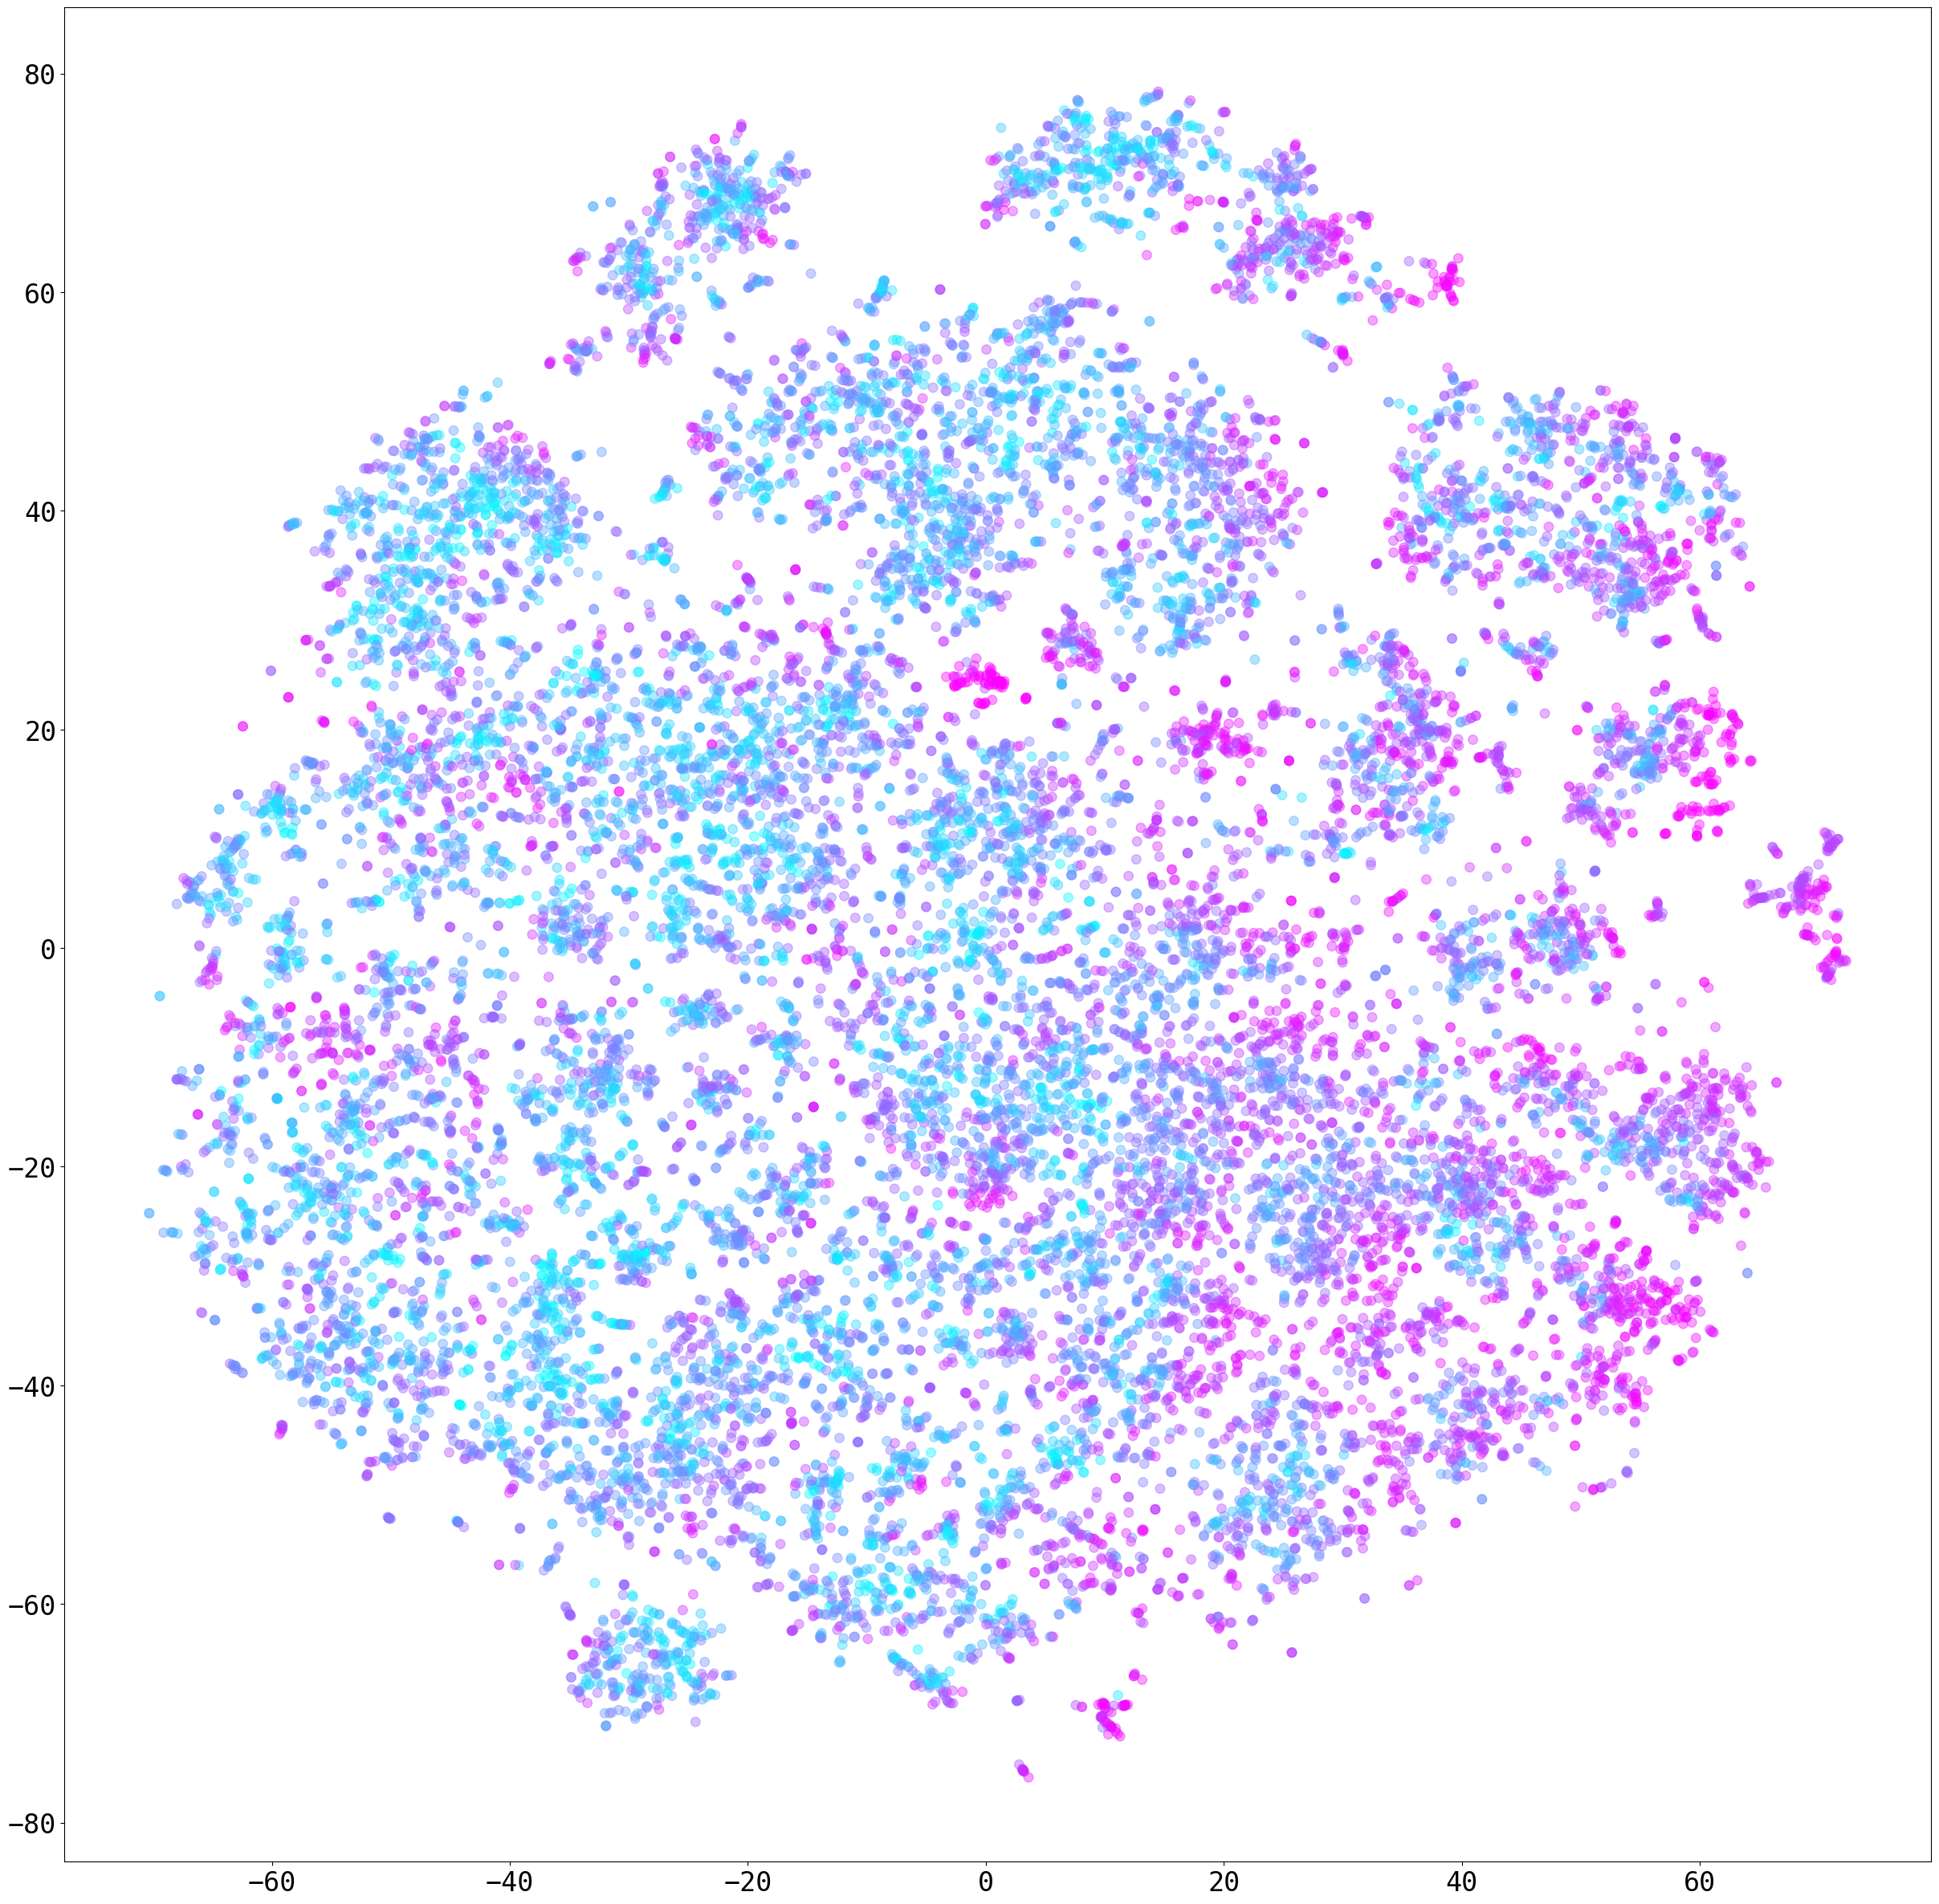

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(mof_arr_2d[:,0], mof_arr_2d[:,1], c=color_label, s=70, alpha=.4, cmap='cool')

In [22]:
model.dv.index_to_key

['RSM1099',
 'RSM1927',
 'RSM1933',
 'RSM3842',
 'RSM0344',
 'RSM4122',
 'RSM2553',
 'RSM3895',
 'RSM2235',
 'RSM1728',
 'RSM4136',
 'RSM2547',
 'RSM1066',
 'RSM0378',
 'RSM1700',
 'RSM3117',
 'RSM3103',
 'RSM1714',
 'RSM1072',
 'RSM3665',
 'RSM4485',
 'RSM2792',
 'RSM0191',
 'RSM4491',
 'RSM2976',
 'RSM2962',
 'RSM0620',
 'RSM4446',
 'RSM2037',
 'RSM2751',
 'RSM4320',
 'RSM0146',
 'RSM1258',
 'RSM0152',
 'RSM2745',
 'RSM4452',
 'RSM2023',
 'RSM0634',
 'RSM1264',
 'RSM3473',
 'RSM4308',
 'RSM1270',
 'RSM1516',
 'RSM3301',
 'RSM1489',
 'RSM4297',
 'RSM4283',
 'RSM0783',
 'RSM2194',
 'RSM0973',
 'RSM2816',
 'RSM0967',
 'RSM0754',
 'RSM4532',
 'RSM4254',
 'RSM2625',
 'RSM1338',
 'RSM0026',
 'RSM4240',
 'RSM2631',
 'RSM2157',
 'RSM3249',
 'RSM4526',
 'RSM0740',
 'RSM0998',
 'RSM3261',
 'RSM0768',
 'RSM3507',
 'RSM2619',
 'RSM3513',
 'RSM1304',
 'RSM1462',
 'RSM3275',
 'RSM3922',
 'RSM0595',
 'RSM1853',
 'RSM2382',
 'RSM2396',
 'RSM3088',
 'RSM1847',
 'RSM4081',
 'RSM0230',
 'RSM4056',
 'RS

In [28]:
model.dv.most_similar(['RSM1933'])[0][1]

0.9502902626991272

In [30]:
for i in model.dv.index_to_key:
    if model.dv.most_similar(i)[0][1] > 0.97:
        print("%s: %s" %(i, model.dv.most_similar(i)[0]))

RSM0750: ('RSM2238', 0.9736336469650269)
RSM3632: ('RSM4403', 0.9723718166351318)
RSM4403: ('RSM3632', 0.9723718166351318)
RSM2238: ('RSM0750', 0.9736336469650269)


In [5]:
model.dv.most_similar(['qmof-200091d'])

[('qmof-d206dbf', 0.962598443031311),
 ('qmof-fc7ce55', 0.9617239236831665),
 ('qmof-057b4a2', 0.9525168538093567),
 ('qmof-5dc5445', 0.9519547820091248),
 ('qmof-b8f9fb5', 0.9479665756225586),
 ('qmof-66735fe', 0.9433470964431763),
 ('qmof-64aeaba', 0.9299312233924866),
 ('qmof-ece4651', 0.9244040250778198),
 ('qmof-37488ee', 0.9214565753936768),
 ('qmof-514f310', 0.921185314655304)]

In [51]:
tasks = ["k$_H$", "0.15 bar", "16 bar"]
features = ["Geometry", "Composition", "RACs", "mof2vec"]

In [32]:
test_r2 = [
    [0.25502390689653, 0.285592764119569, 0.969812497338305],
    [0.423356147302655, 0.339849028581816, 0.439533447900597],
    [0.567032256058024, 0.418803067782068, 0.5513086752743],
    [0.227287187437521, 0.2019452891966821, 0.3761405111699633]
]

In [ ]:
ch4_test_r2 = [
    [0.57785779240322, 0.79271949108608, 0.97229143423433],
    [0.407473326180681, 0.382758886946868, 0.530697147147064],
    [0.510486917604684, 0.532647330975654, 0.556615353568679],
    [0.133052673749243, 0.276086264538163, ]
]

Text(0.5, 1.0, 'CO$_2$ uptake')

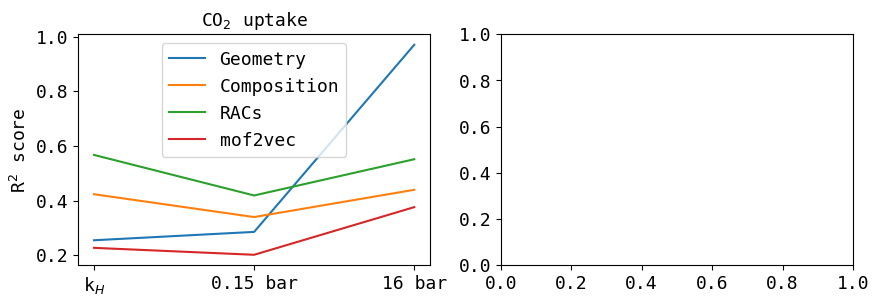

In [77]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,3)
for i, arr in enumerate(test_r2):
    ax[0].plot(np.arange(3), arr, label=features[i])

ax[0].set_xticks(np.arange(3))
ax[0].set_xticklabels(labels=tasks, fontdict={'fontsize': 13})

plt.yticks(fontsize=13)
ax[0].set_ylabel("R$^2$ score", fontdict={'fontsize': 13})
ax[0].legend()
ax[0].set_title("CO$_2$ uptake", fontdict={'fontsize': 13})



#fig.savefig("../../../files/CO2_r2.png")

In [80]:
model.wv.key_to_index

{'H': 0,
 'C': 1,
 'H_C': 2,
 'O': 3,
 'C_C_C_H': 4,
 'H_C_C_C_C_H': 5,
 'C_C_O_O': 6,
 'C_C_C_C': 7,
 'N': 8,
 'C_C_C_C_C_C_C_H_C_C_C_H_C_C_O_O': 9,
 'C_C_C_H_C_C_C_C_C_C_C_H_H_C': 10,
 'H_C_C_C_H_N': 11,
 'C_C_H_N': 12,
 'C_C_C_H_C_C_C_C_C_C_C_C_H_C': 13,
 'O_C': 14,
 'C_C_C_N': 15,
 'O_C_C_C_O_O': 16,
 'Zn': 17,
 'C_C_C_C_C_C_C_C_C_C_C_H_C_C_C_H': 18,
 'C_C_C_H_C_C_C_C_C_C_H_N_H_C': 19,
 'O_C_Zn': 20,
 'Cu': 21,
 'Cd': 22,
 'H_O': 23,
 'C_C_C_O': 24,
 'C_C_C_H_C_C_C_H_C_C_C_H_H_C': 25,
 'C_C_O_O_C_C_C_C_O_C_Zn_O_C_Zn': 26,
 'N_C_C_C': 27,
 'H_C_C_C_C_H_H': 28,
 'C_C_C_H_H': 29,
 'H_C_C_H_N_N': 30,
 'C_H_N_N': 31,
 'H_N': 32,
 'O_C_Cd': 33,
 'C_C_C_H_C_C_C_H_C_C_C_N_H_C': 34,
 'N_C_C_Zn': 35,
 'O_C_Cu': 36,
 'H_C_C_C_H_H_N': 37,
 'C_C_H_H_N': 38,
 'C_C_H_H_H': 39,
 'H_C_C_C_H_H_H': 40,
 'logKH_CO2_8': 41,
 'logKH_CH4_6': 42,
 'logKH_CH4_8': 43,
 'logKH_CH4_9': 44,
 'logKH_CH4_3': 45,
 'logKH_CO2_3': 46,
 'logKH_CO2_0': 47,
 'logKH_CO2_9': 48,
 'logKH_CO2_6': 49,
 'logKH_CH4_0': 50,
 

In [89]:
model.wv['Zn_N_N_N_N']

array([-0.08486884, -0.57052046,  0.2866249 , -0.41141436, -0.46857896,
        0.1746045 , -0.4332301 , -0.58675975,  0.22156638,  1.0000703 ,
       -0.4748033 , -0.01521041,  0.69898784, -0.16222529,  0.32040554,
       -0.49771127,  0.11107818, -0.02911926,  0.13415112,  0.75368714,
       -0.01473403, -0.8679152 ,  0.05957915,  0.5344715 , -0.64615935,
        0.59924847,  0.27071157,  0.10668226,  0.0414931 ,  0.31318843,
        0.45065674,  0.3535452 , -0.5213805 ,  0.9969976 , -0.33300266,
       -0.76339   ,  0.23152015, -0.9392834 ,  0.04220308,  0.9741371 ,
        0.38270813,  0.11729192,  0.7675721 ,  0.5754261 , -0.9333784 ,
        0.07526519,  0.3992579 , -0.06805097,  0.32058212,  1.0752909 ,
       -0.04463117,  0.3005146 ,  0.12206303,  0.8459193 ,  0.6398804 ,
       -0.403638  ,  1.2156224 , -0.3910754 , -0.6247272 ,  0.28445414,
        0.28010663,  0.07119543, -0.2216192 ,  0.39035094,  0.72664773,
       -0.43101233,  0.151174  , -0.5912994 , -0.12826818, -0.79

In [94]:
from numpy.linalg import norm

In [95]:
bbs = ["Al_O_O_O_O", "La_O_O_O", "U_O_O_O_O_O", "Al_O_O_O_O_O_O", 'Ni_N_N_O_O_O_O', 'Zn_N_N_N_N']

In [93]:
co2_bin = ["logKH_CO2_%s" %i for i in range(10)]
ch4_bin = ["logKH_CH4_%s" %i for i in range(10)]

In [98]:
co2_att = []
for bb in bbs:
    cos = []
    a = model.wv[bb]
    for bin in co2_bin:
        b = model.wv[bin]
        cos.append(np.dot(a,b)/(norm(a)*norm(b)))
    co2_att.append(cos)
    

In [100]:
ch4_att = []
for bb in bbs:
    cos = []
    a = model.wv[bb]
    for bin in ch4_bin:
        b = model.wv[bin]
        cos.append(np.dot(a,b)/(norm(a)*norm(b)))
    ch4_att.append(cos)

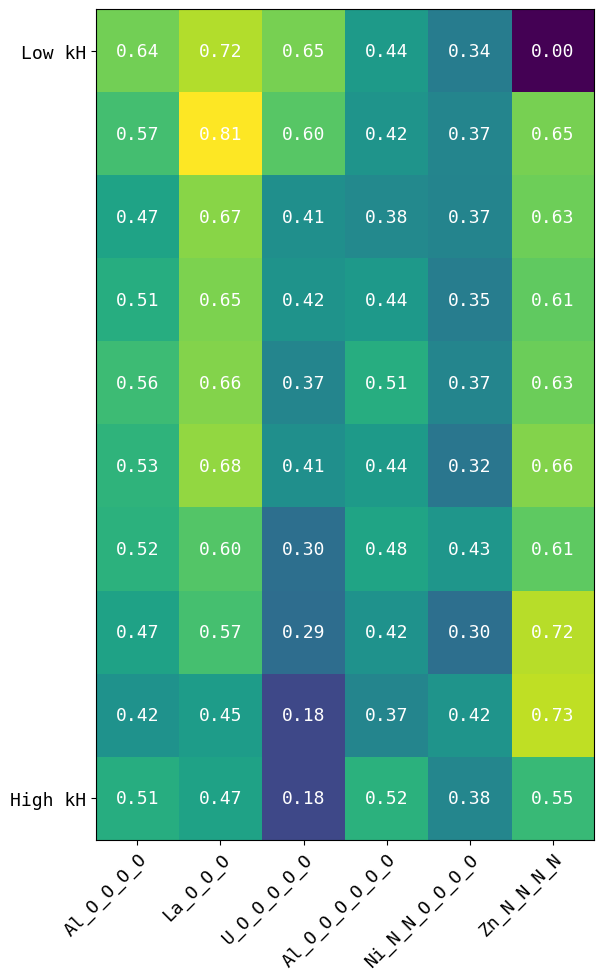

In [115]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(10)
im = ax.imshow(np.array(ch4_att).T)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(bbs)), labels=bbs)
ax.set_yticks((0, 9), labels=["Low kH", "High kH"])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(co2_bin)):
    for j in range(len(bbs)):
        text = ax.text(j, i, "%.2f" %ch4_att[j][i],
                       ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
fig.savefig("../../../files/heatmap_ch4.png")